### Importing Libraries and modules 

In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import pandas as pd
# from telethon import TelegramClient, events
sys.path.append(os.path.abspath('../src'))
sys.path.append(os.path.abspath('../Scripts'))
from Preprocess import Preprocess
from data_loader import DataLoad
from plot import Visualization
from named_entity_recognation import CoNLLLabeler
# from telegram_scrapper import DataCrawling

In [9]:
# pip install pandas 
# pip install transformers

### Intantitioninstantiating Classes

In [2]:
preprocess = Preprocess()
data_load = DataLoad()
plot = Visualization()

### Read and load data of different CSV files and merging it then save it in one dataframe

In [3]:
result = data_load.read_csv_txt_data()

### Read labeled data using DataFraem

In [4]:
labeled_data = data_load.lalebed_file()

In [33]:
labeled_data.head()

,Token,Label
0,3pcs,B-PRODUCT
1,silicon,I-PRODUCT
2,brush,I-PRODUCT
3,spatulas,I-PRODUCT
4,እስከ,O


In [34]:
result.shape

(66437, 6)

In [16]:
result.head()

,Channel Title,Channel Username,ID,Message,Date,Media Path
0,Sheger online-store,@Shageronlinestore,6202,NaN,2025-01-15 16:11:58+00:00,photos2/@Shageronlinestore_6202.jpg
1,Sheger online-store,@Shageronlinestore,6201,NaN,2025-01-15 16:11:58+00:00,photos2/@Shageronlinestore_6201.jpg
2,Sheger online-store,@Shageronlinestore,6200,NaN,2025-01-15 16:11:58+00:00,photos2/@Shageronlinestore_6200.jpg
3,Sheger online-store,@Shageronlinestore,6199,NaN,2025-01-15 16:11:57+00:00,photos2/@Shageronlinestore_6199.jpg
4,Sheger online-store,@Shageronlinestore,6198,NaN,2025-01-15 16:11:57+00:00,photos2/@Shageronlinestore_6198.jpg


### Data Tokenization, Normalizatio using Positional Tokenization 

In [5]:
# Apply the tokenization function to your DataFrame
result = preprocess.tokenize_dataframe(result, message_column='Message')

### Prepare Data as Cleaned Structure 

In [6]:
result = preprocess.clean_structure(result)

In [7]:
result.tail()

,Channel Title,Channel Username,ID,Date,Media Path,Content,input_ids,attention_mask,token_type_ids
66432,qnash.com - ቅናሽ ®️,@qnashcom,20,2020-08-26 02:44:03+00:00,qnashcom_photos/@qnashcom_20.jpg,👔የልብስ መተኮሻ ቴብል ከ ኦርጅናል ስቲም ካውያ ጋር \n -የራሱ መቆጣ...,"[[101, 100, 100, 100, 100, 100, 100, 100, 100,...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
66433,qnash.com - ቅናሽ ®️,@qnashcom,19,2020-08-26 02:32:16+00:00,qnashcom_photos/@qnashcom_19.jpg,🚫ቤትዎን ከአይጥ 🐀 ከበረሮ🕷 እና ከተባይ🐜 🚫\n ...,"[[101, 100, 100, 100, 100, 100, 100, 100, 100,...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
66434,qnash.com - ቅናሽ ®️,@qnashcom,18,2020-08-26 02:16:56+00:00,qnashcom_photos/@qnashcom_18.jpg,😍 ታላቅ ቅናሽ 😍\nዘመናዊ መደርደሪያው ብረት የሆነ ጫማ መደርደሪያ\n...,"[[101, 100, 100, 100, 100, 100, 100, 100, 100,...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
66435,qnash.com - ቅናሽ ®️,@qnashcom,17,2020-08-25 17:14:43+00:00,NaN,NaN,None,None,None
66436,qnash.com - ቅናሽ ®️,@qnashcom,1,2020-05-22 04:16:48+00:00,NaN,NaN,None,None,None


### Store Preprocessed Data in to SQLit Database

In [8]:
# Store preprocessed data to sqlit database
preprocess.store_preprocessed_data(result)

### Read Save Data from SQLit Database

In [9]:
# Fetch The data from SQLit Database
result = preprocess.ReadSavedDate('telegram_data.db', 'telegram_messages')

In [10]:
result.shape

(66437, 10)

In [11]:
df = result
# Replace "None" strings with actual NaN values
df.replace("None", pd.NA, inplace=True)

In [9]:
# pip install matplotlib seaborn missingno

### Transform Date in to Date time format, then check top five values

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# ===== EDA =====
print("\n--- Data Overview ---")
df.head()  # Display the first few rows



--- Data Overview ---


,id,MESSAGE_ID,Channel_Title,Channel_Username,Date,Media_Path,Content,input_ids,attention_mask,token_type_ids
0,1,6202,Sheger online-store,@Shageronlinestore,2025-01-15 16:11:58,photos2/@Shageronlinestore_6202.jpg,<NA>,<NA>,<NA>,<NA>
1,2,6201,Sheger online-store,@Shageronlinestore,2025-01-15 16:11:58,photos2/@Shageronlinestore_6201.jpg,<NA>,<NA>,<NA>,<NA>
2,3,6200,Sheger online-store,@Shageronlinestore,2025-01-15 16:11:58,photos2/@Shageronlinestore_6200.jpg,<NA>,<NA>,<NA>,<NA>
3,4,6199,Sheger online-store,@Shageronlinestore,2025-01-15 16:11:57,photos2/@Shageronlinestore_6199.jpg,<NA>,<NA>,<NA>,<NA>
4,5,6198,Sheger online-store,@Shageronlinestore,2025-01-15 16:11:57,photos2/@Shageronlinestore_6198.jpg,<NA>,<NA>,<NA>,<NA>


### Check Data Types

In [13]:
print("\n--- Data Types ---")
print(df.dtypes)  # Display column data types


--- Data Types ---
id                           int64
MESSAGE_ID                   int64
Channel_Title               object
Channel_Username            object
Date                datetime64[ns]
Media_Path                  object
Content                     object
input_ids                   object
attention_mask              object
token_type_ids              object
dtype: object


### Check Missing Values

In [14]:
print("\n--- Missing Values ---")
print(df.isnull().sum())  # Count missing values per column


--- Missing Values ---
id                      0
MESSAGE_ID              0
Channel_Title           0
Channel_Username        0
Date                    0
Media_Path          12115
Content             24392
input_ids           24392
attention_mask      24392
token_type_ids      24392
dtype: int64


### Visualize missing values

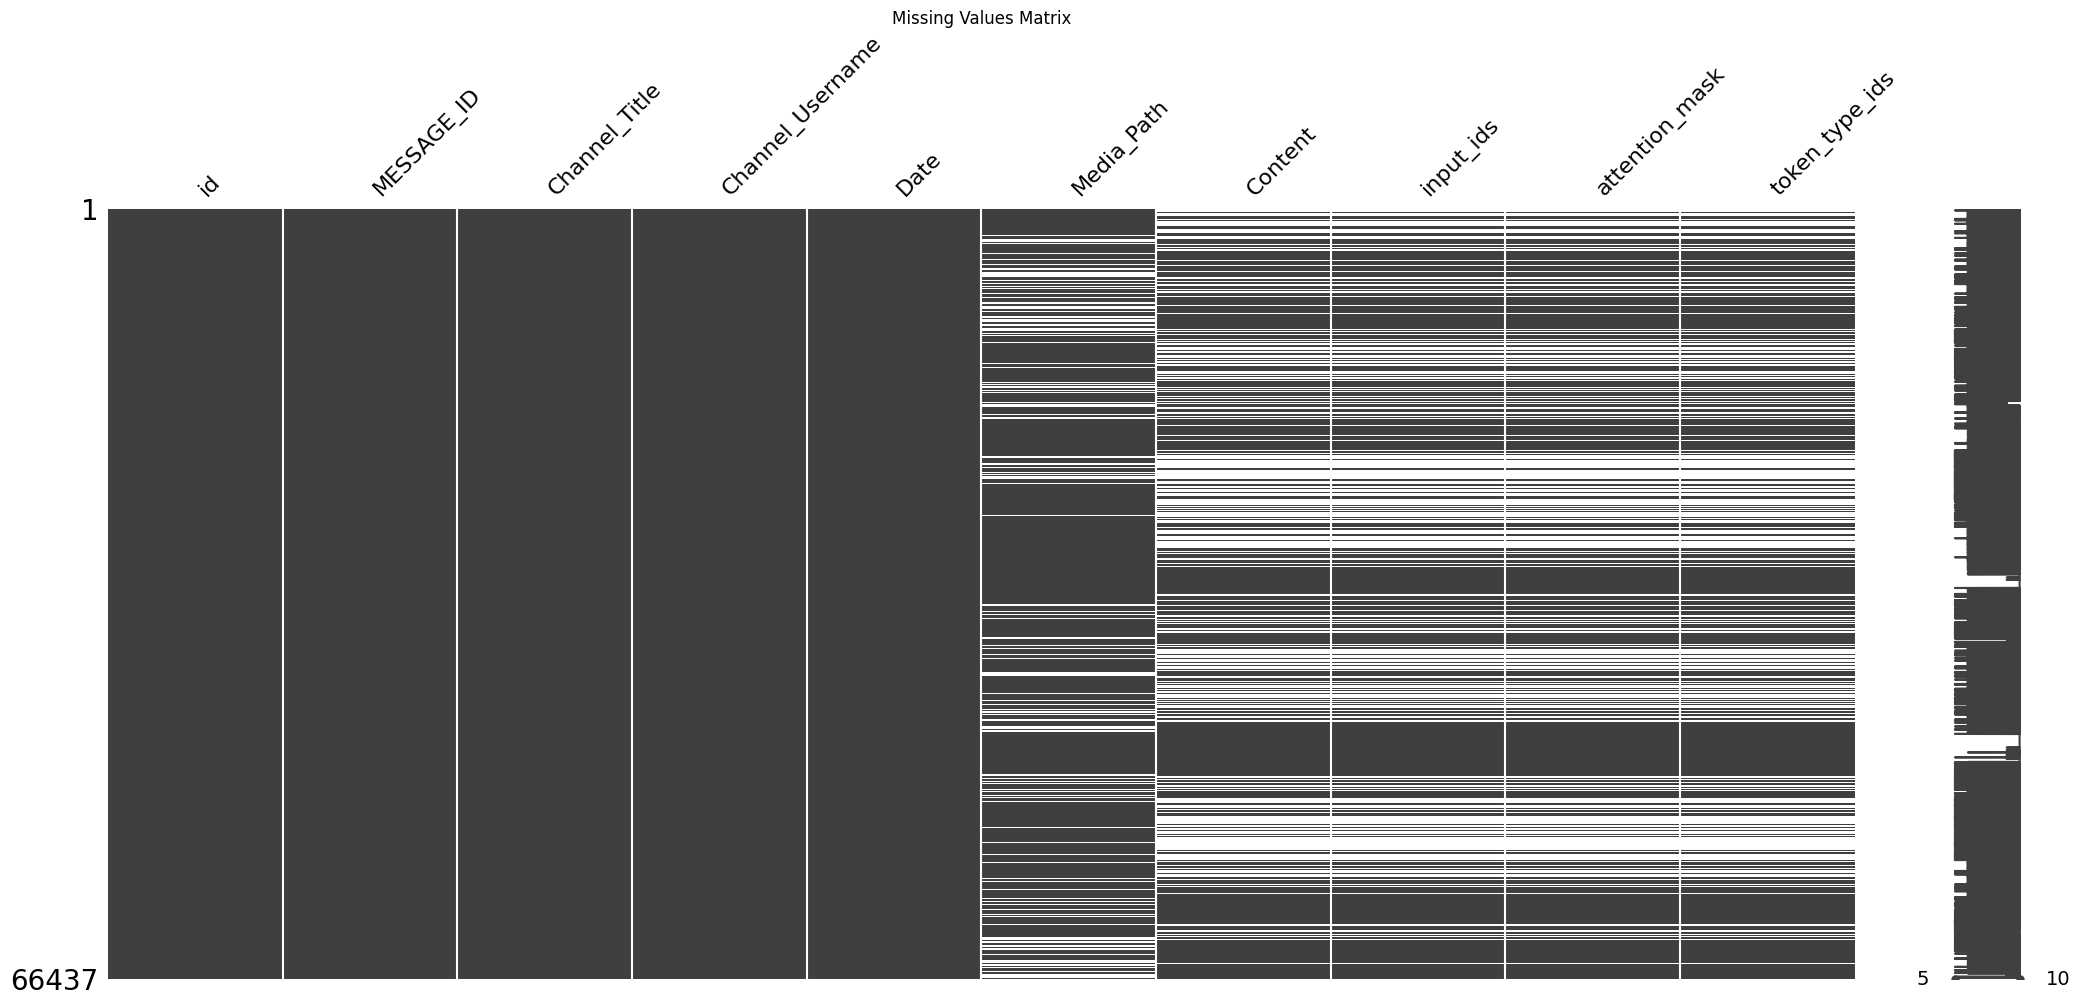

In [15]:
# Visualize missing values
plot.Visualize_missing_values(df)

### Check summary statistics

In [16]:
# Summary statistics
print("\n--- Summary Statistics Object Datatypes---")
df.describe(include='object').T


--- Summary Statistics Object Datatypes---


,count,unique,top,freq
Channel_Title,66437,15,AwasMart-አዋስማርት🎁,7718
Channel_Username,66437,15,@AwasMart,7718
Media_Path,54322,54322,qnashcom_photos/@qnashcom_18.jpg,1
Content,42045,27863,Sold out,262
input_ids,42045,9606,"[[101, 102]]",5036
attention_mask,42045,184,"[[1, 1]]",5036
token_type_ids,42045,184,"[[0, 0]]",5036


In [17]:
# Summary statistics
print("\n--- Summary Statistics Number Datatypes---")
df.describe().T


--- Summary Statistics Number Datatypes---


,count,mean,min,25%,50%,75%,max,std
id,66437.0,33219.0,1.0,16610.0,33219.0,49828.0,66437.0,19178.854254
MESSAGE_ID,66437.0,4494.343935,1.0,2086.0,3870.0,6086.0,15318.0,3215.283784
Date,66437,2023-02-02 11:42:14.656908032,2017-11-30 19:27:07,2022-04-04 05:39:35,2023-06-20 07:30:49,2024-04-13 09:27:43,2025-01-16 12:07:30,NaN


## ===== Data Cleaning =====

### Handle Missing Values

In [18]:
# ===== Data Cleaning =====
# Handle missing values
df_cleaned = preprocess.handlling_missing_values(df)
df_cleaned.isna().sum()


--- Handling Missing Values ---


id                  0
MESSAGE_ID          0
Channel_Title       0
Channel_Username    0
Date                0
Media_Path          0
Content             0
input_ids           0
attention_mask      0
token_type_ids      0
dtype: int64

### Handle duplicate data

In [19]:
# Handle duplicate data
df_cleaned = preprocess.check_and_handlling_duplicate_values(df_cleaned)


--- Checking Duplicates ---
Number of duplicate rows: 0


### Check datetime Range

In [20]:
# Basic datetime analysis
print("\n--- Date Analysis ---")
print(f"Date range: {df_cleaned['Date'].min()} to {df_cleaned['Date'].max()}")


--- Date Analysis ---
Date range: 2017-11-30 19:27:07 to 2025-01-16 12:07:30


### Message count per username

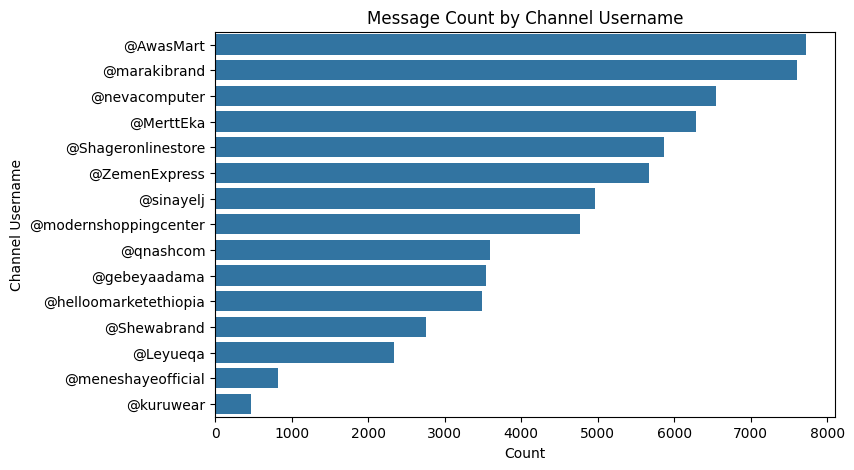

In [21]:
# ===== Visualization =====
# Message count per username
plot.message_count_per_username(df_cleaned)

### Messages over time (trend)

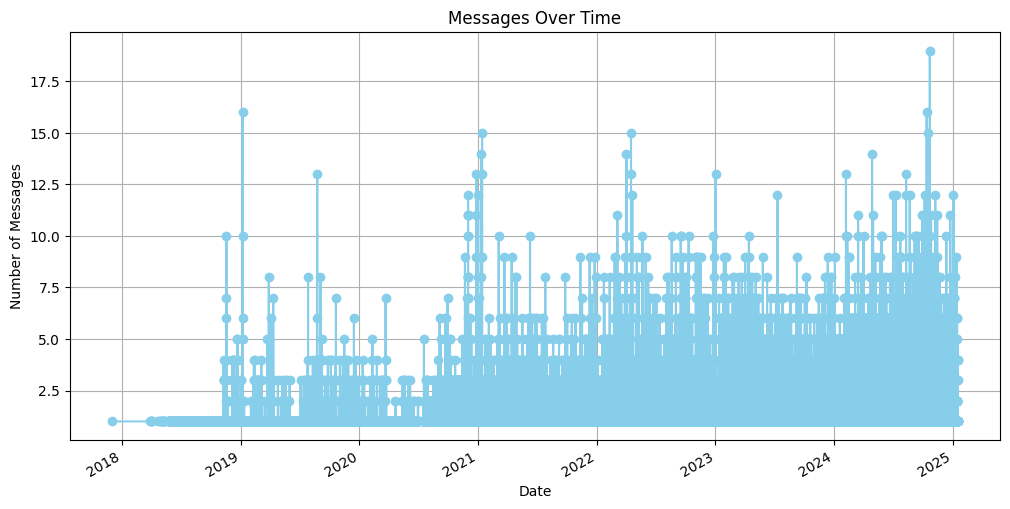

In [22]:
# Messages over time (trend)
plot.messages_over_time_trend(df_cleaned)

### Distribution of Message IDs

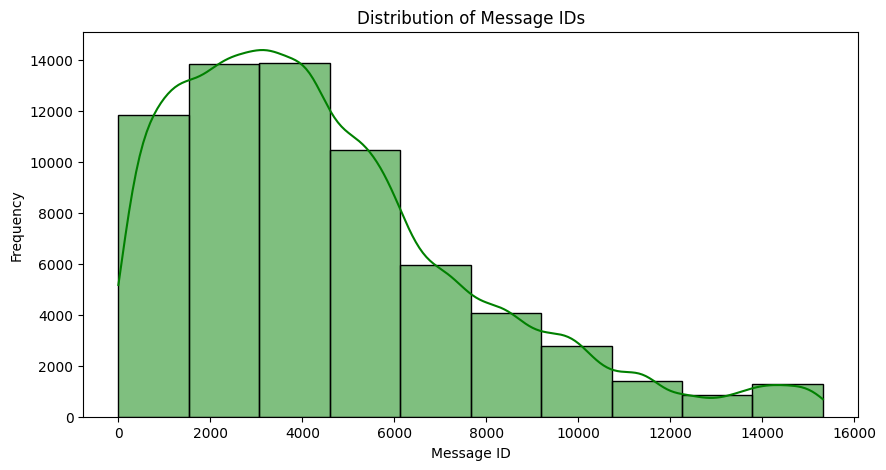

In [23]:
# Distribution of Message IDs
plot.Distribution_of_Message_IDs(df_cleaned)

In [24]:
# plot.Distribution_of_Content(df_cleaned)

### Word count in 'Content'

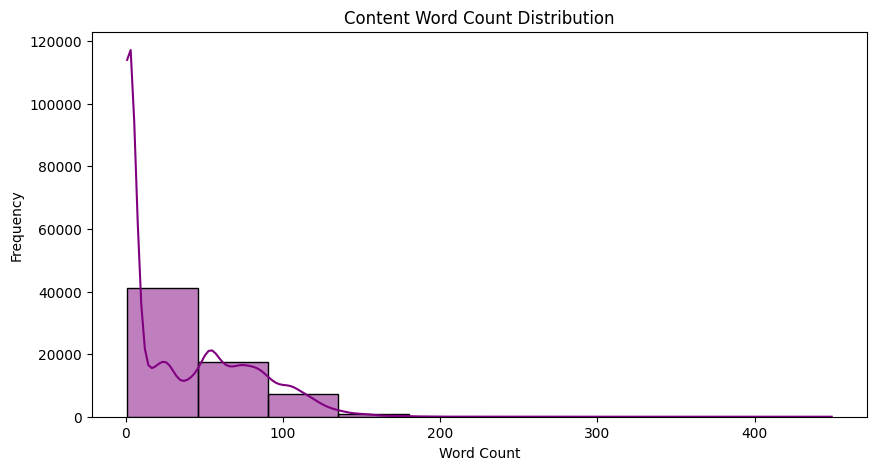

In [26]:
#  Word count in 'Content' (if available)
plot.word_count_in_content(df_cleaned)

In [50]:
# # ===== Save Cleaned Data =====
# cleaned_data_path = "cleaned_telegram_data.csv"
# df_cleaned.to_csv(cleaned_data_path, index=False)
# print(f"\nCleaned data saved to: {cleaned_data_path}")

In [27]:
labeled_data.head()

,Token,Label
0,3pcs,B-PRODUCT
1,silicon,I-PRODUCT
2,brush,I-PRODUCT
3,spatulas,I-PRODUCT
4,እስከ,O


### Task 2
#### CoNLLLabeler

In [28]:
# Initialize the CoNLLLabeler
labeler = CoNLLLabeler(dataset=df_cleaned, labeled_data=labeled_data)

### Process 30 messages

In [31]:
# Process 30 messages (or as many as are available)
labeled_messages = labeler.process_messages(num_messages=30)

### Save the labeled messages in CoNLL format

In [32]:
# Save the labeled messages in CoNLL format
output_path = "labeled_data.conll"
labeler.save_conll_format(labeled_messages, output_path)

print(f"Labeled data saved in CoNLL format to {output_path}")

Labeled data saved in CoNLL format to labeled_data.conll
